<a href="https://colab.research.google.com/github/kkitagawaa/Colab/blob/main/Information_Analysis/Document_Analysis/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
import numpy as np
import pandas as pd

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.corpus import twitter_samples

negative_tweets = twitter_samples.strings('negative_tweets.json')
positive_tweets = twitter_samples.strings('positive_tweets.json')
other_tweets = twitter_samples.strings('tweets.20150430-223406.json')

documents = negative_tweets + positive_tweets + other_tweets[:5000]

for doc in documents[:10]:
  print(doc)


1:  hopeless for tmr :(
1:  Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
1:  @Hegelbon That heart sliding into the waste basket. :(
1:  “@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
1:  Dang starting next week I have "work" :(
1:  oh god, my babies' faces :( https://t.co/9fcwGvaki0
1:  @RileyMcDonough make me smile :((
1:  @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln
1:  why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"
1:  Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz


In [31]:
import re

def cleaning_text(text):
    pattern1 = '@' 
    pattern2 = 'RT'
    pattern3 = 'http://.*'
    pattern4 = ':'
    pattern5 = '\('
    
    text = re.sub(pattern1, '', text)
    text = re.sub(pattern2, '', text)
    text = re.sub(pattern3, '', text)
    text = re.sub(pattern4, '', text)    
    text = re.sub(pattern5, '', text)
    return text
  
for text in documents[:5]:
    print(cleaning_text(text))

hopeless for tmr 
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months 
Hegelbon That heart sliding into the waste basket. 
“ketchBurning I hate Japanese call him "bani"  ”

Me too
Dang starting next week I have "work" 


In [32]:
def tokenize_text(text):
  if not isinstance(text, str):
    raise ValueError("Expected input is a string. Given: " + str(type(text)))
  text = re.sub(r'[.,]', '', text)
  return text.split()

for text in documents[:5]:
  text = cleaning_text(text)
  # print(text)
  print(tokenize_text(text))

['hopeless', 'for', 'tmr']
['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months']
['Hegelbon', 'That', 'heart', 'sliding', 'into', 'the', 'waste', 'basket']
['“ketchBurning', 'I', 'hate', 'Japanese', 'call', 'him', '"bani"', '”', 'Me', 'too']
['Dang', 'starting', 'next', 'week', 'I', 'have', '"work"']


In [33]:

from nltk.corpus import wordnet as wn

def lemmatize_word(word):
    word=word.lower()
    
    # lemmatize  example: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
      return lemma

In [34]:

for text in documents[:5]:
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  print([lemmatize_word(word) for word in tokens])

['hopeless', 'for', 'tmr']
['everything', 'in', 'the', 'kid', 'section', 'of', 'ikea', 'be', 'so', 'cute', 'shame', "i'm", 'nearly', '19', 'in', '2', 'month']
['hegelbon', 'that', 'heart', 'slide', 'into', 'the', 'waste', 'basket']
['“ketchburning', 'i', 'hate', 'japanese', 'call', 'him', '"bani"', '”', 'me', 'too']
['dang', 'starting', 'next', 'week', 'i', 'have', '"work"']


In [35]:
en_stop = nltk.corpus.stopwords.words('english')


def remove_stopwords(word, stopwordset):
  if word in stopwordset:
    return None
  else:
    return word
     

In [36]:

for text in documents[:5]:
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [lemmatize_word(word) for word in tokens]
  print([remove_stopwords(word, en_stop) for word in tokens])

['hopeless', None, 'tmr']
['everything', None, None, 'kid', 'section', None, 'ikea', None, None, 'cute', 'shame', "i'm", 'nearly', '19', None, '2', 'month']
['hegelbon', None, 'heart', 'slide', None, None, 'waste', 'basket']
['“ketchburning', None, 'hate', 'japanese', 'call', None, '"bani"', '”', None, None]
['dang', 'starting', 'next', 'week', None, None, '"work"']


In [77]:

def preprocessing_text(text):
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [lemmatize_word(word) for word in tokens]
  tokens = [remove_stopwords(word, en_stop) for word in tokens]
  tokens = [word for word in tokens if word is not None]
  return tokens


preprocessed_docs = [preprocessing_text(text) for text in documents]
preprocessed_docs

[['hopeless', 'tmr'],
 ['everything',
  'kid',
  'section',
  'ikea',
  'cute',
  'shame',
  "i'm",
  'nearly',
  '19',
  '2',
  'month'],
 ['hegelbon', 'heart', 'slide', 'waste', 'basket'],
 ['“ketchburning', 'hate', 'japanese', 'call', '"bani"', '”'],
 ['dang', 'starting', 'next', 'week', '"work"'],
 ['oh', 'god', "babies'", 'face', 'https//tco/9fcwgvaki0'],
 ['rileymcdonough', 'make', 'smile'],
 ['f0ggstar',
  'stuartthull',
  'work',
  'neighbour',
  'motor',
  'ask',
  'say',
  'hate',
  'update',
  'search'],
 ['why?"tahuodyy', 'sialan', 'https//tco/hv1i0xcrl2"'],
 ['athabasca',
  'glacier',
  'wa',
  '#1948',
  '-',
  '#athabasca',
  '#glacier',
  '#jasper',
  '#jaspernationalpark',
  '#alberta',
  '#explorealberta',
  '#…'],
 ['really', 'good', 'm&amp;g', 'idea', "i'm", 'never', 'going', 'meet'],
 ['rampageinthebox', 'mare', 'ivan'],
 ['sophiamascardo', 'happy', 'trip', 'keep', 'safe', 'see', 'soon', '*'],
 ["i'm", 'tire', 'hahahah'],
 ['grumpycockney', 'knee', 'replacement', '

In [78]:

def bow_vectorizer(docs):
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
        
  result_list = []
  for doc in docs:
    doc_vec = [0] * len(word2id)
    for w in doc:
      doc_vec[word2id[w]] += 1
    result_list.append(doc_vec)
  return result_list, word2id

In [79]:

bow_vec, word2id = bow_vectorizer(preprocessed_docs)
print(bow_vec)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
word2id.items()

dict_items([('hopeless', 0), ('tmr', 1), ('everything', 2), ('kid', 3), ('section', 4), ('ikea', 5), ('cute', 6), ('shame', 7), ("i'm", 8), ('nearly', 9), ('19', 10), ('2', 11), ('month', 12), ('hegelbon', 13), ('heart', 14), ('slide', 15), ('waste', 16), ('basket', 17), ('“ketchburning', 18), ('hate', 19), ('japanese', 20), ('call', 21), ('"bani"', 22), ('”', 23), ('dang', 24), ('starting', 25), ('next', 26), ('week', 27), ('"work"', 28), ('oh', 29), ('god', 30), ("babies'", 31), ('face', 32), ('https//tco/9fcwgvaki0', 33), ('rileymcdonough', 34), ('make', 35), ('smile', 36), ('f0ggstar', 37), ('stuartthull', 38), ('work', 39), ('neighbour', 40), ('motor', 41), ('ask', 42), ('say', 43), ('update', 44), ('search', 45), ('why?"tahuodyy', 46), ('sialan', 47), ('https//tco/hv1i0xcrl2"', 48), ('athabasca', 49), ('glacier', 50), ('wa', 51), ('#1948', 52), ('-', 53), ('#athabasca', 54), ('#glacier', 55), ('#jasper', 56), ('#jaspernationalpark', 57), ('#alberta', 58), ('#explorealberta', 59),

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


vectorizer = TfidfVectorizer(stop_words='english')


preprocessed_docs=[" ".join(doc) for doc in preprocessed_docs]
print(preprocessed_docs)

tf_idf = vectorizer.fit_transform(preprocessed_docs)

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state = 0)

clusters = km.fit_predict(tf_idf)

for doc, cls in zip(preprocessed_docs, clusters):
    print(cls,doc)



[['hopeless', 'tmr'], ['everything', 'kid', 'section', 'ikea', 'cute', 'shame', "i'm", 'nearly', '19', '2', 'month'], ['hegelbon', 'heart', 'slide', 'waste', 'basket'], ['“ketchburning', 'hate', 'japanese', 'call', '"bani"', '”'], ['dang', 'starting', 'next', 'week', '"work"'], ['oh', 'god', "babies'", 'face', 'https//tco/9fcwgvaki0'], ['rileymcdonough', 'make', 'smile'], ['f0ggstar', 'stuartthull', 'work', 'neighbour', 'motor', 'ask', 'say', 'hate', 'update', 'search'], ['why?"tahuodyy', 'sialan', 'https//tco/hv1i0xcrl2"'], ['athabasca', 'glacier', 'wa', '#1948', '-', '#athabasca', '#glacier', '#jasper', '#jaspernationalpark', '#alberta', '#explorealberta', '#…'], ['really', 'good', 'm&amp;g', 'idea', "i'm", 'never', 'going', 'meet'], ['rampageinthebox', 'mare', 'ivan'], ['sophiamascardo', 'happy', 'trip', 'keep', 'safe', 'see', 'soon', '*'], ["i'm", 'tire', 'hahahah'], ['grumpycockney', 'knee', 'replacement', 'get', '&amp;', 'day', '-', 'ouch'], ['relate', '"sweet', "n'", 'sour"', 'k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ストリーミング出力は最後の 5000 行に切り捨てられました。
3 i'm high -) love stash '-)
3 nekonyoung problemmmmmmm
3 hi stefaniescott hope great time full happiness ) love 75x
3 jb_jaebumjb write english ))
3 hahaha yeeaayy today i'm happy! !!! alhamdulillah god )
3 alexandratirziu hey! saw lot sport - like most?) #ceo1month #sandroforceo adeccowaytowork #happy
3 lucky shot )
3 like back ) — 😊
3 aepfel pleasure! let us know there's anything else need )
0 amin ) https//tco/1fomqssxzk
3 tessapearsonart venetianorris - agree! 'weed' anyway? like definition 'a plant growing wrong place' -)
3 going home )
3 #crowdfunding campaign! get goal walk dream help us? )
3 ksgpsd sound romantic )
3 hellooooooooo friday! meet again! ) almost weekend! )
3 aldiusa love store!!! best chocolate selection )
3 thank follow ruthjackbbo great day )
3 supportorganize hey lynne fb buffer button bring composer buffer fb share ) -mary
3 parktheatre nobillington thanks! )
3 looking find virtualumbrella give shout sending lots email today ) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



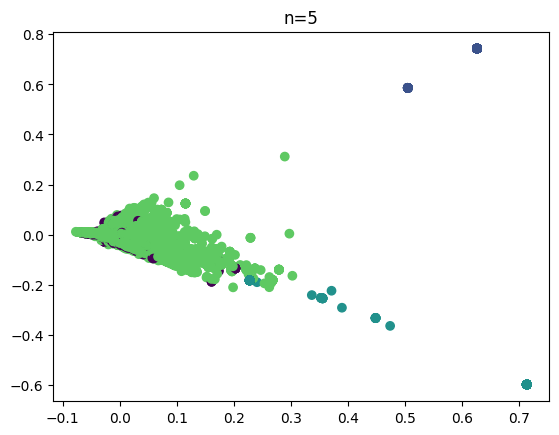

In [84]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data2D = pca.fit_transform(tf_idf.toarray())

# クラスタリング結果の可視化
plt.scatter(data2D[:,0], data2D[:,1], c=km.labels_)
plt.title("n=5")
plt.show()